# Asset Beta & Market Beta 

The volatility that a benchmark portfolio (S&P 500 index) or a market portfolio exhibits is known as systematic risk. Beta is the historical measure of the risk of any individual stock or portfolio against the risk of the market portfolio. In other words, it measures the volatility of any security with respect to the overall market volatility

### Import the data in python and plot the daily returns of Google and S&P 500 index.

In [16]:
#Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import statsmodels.api as sm
from statsmodels import regression
from pandas_datareader import data as pdr
import yfinance as yf


In [17]:
df1 = pdr.get_data_yahoo("GOOG", start = "2021-01-01", end = dt.datetime.now())
df2 = pdr.get_data_yahoo("^GSPC", start = "2021-01-01", end = dt.datetime.now())

In [18]:
# Take the % changes to get to returns hence we will use function pct_change()
# we dont want the first (0th) element because it is NAN

return_goog = df1.Close.pct_change()[1:]
return_sp500 = df2.Close.pct_change()[1:]

In [31]:
return_goog

Date
2021-01-05    0.007337
2021-01-06   -0.003234
2021-01-07    0.029943
2021-01-08    0.011168
2021-01-11   -0.022405
                ...   
2021-08-31   -0.000052
2021-09-01    0.002612
2021-09-02   -0.011129
2021-09-03    0.003855
2021-09-07    0.005139
Name: Close, Length: 170, dtype: float64

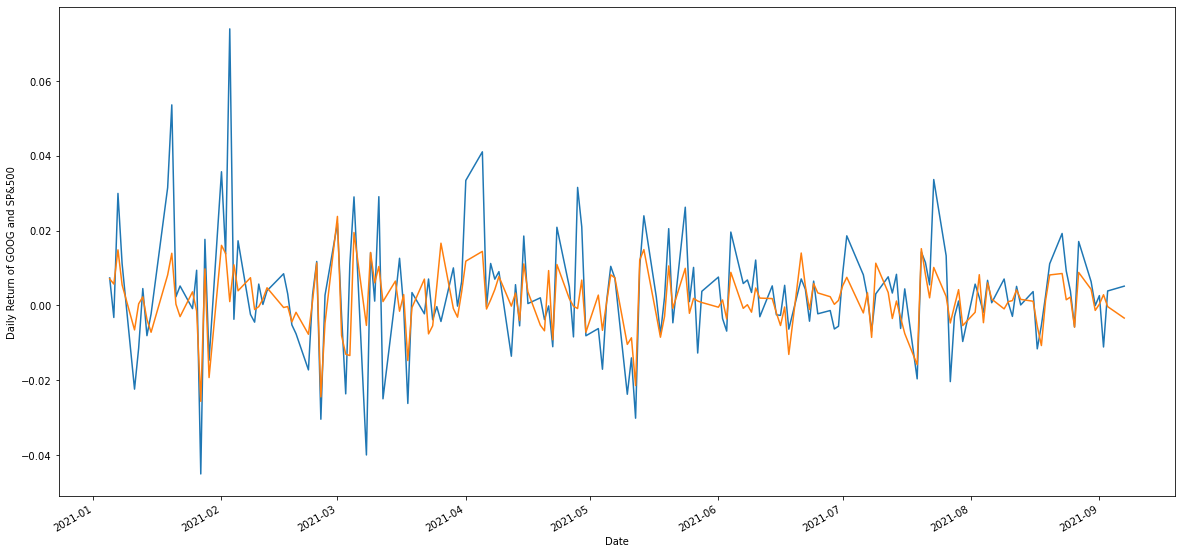

In [19]:
#Plot the returns of Google and SP&500 against each other
plt.figure(figsize=(20,10))
return_goog.plot()
return_sp500.plot()
plt.ylabel("Daily Return of GOOG and SP&500")
plt.show()

#The returns that are more volatile (in blue) are that of Google and the less volatile
#returns (in orange) are that of the S&P 500 index.

# Calculate Google’s beta against S&P 500.

In [20]:
X = return_sp500.values
Y = return_goog.values

In [21]:
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    
    #removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

    
    

In [23]:
alpha, beta = linreg(X,Y)


In [26]:
print( 'alpha: ' + str(alpha))
print( 'beta: ' + str(beta))

alpha: 0.0016201675539212336
beta: 1.2920378658035374


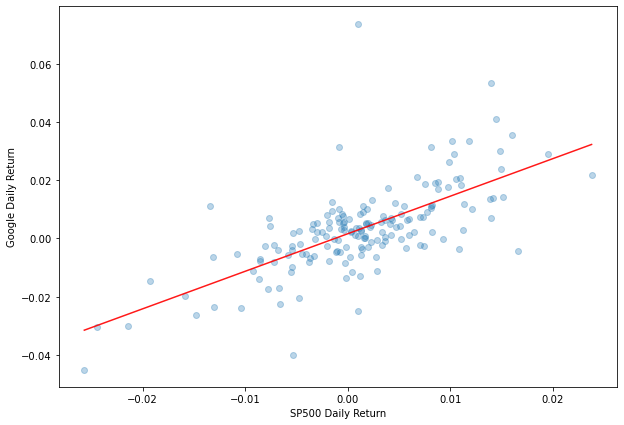

In [30]:
#Linear regression Plot
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(10,7))
plt.scatter(X,Y, alpha = 0.3) #Plot the Raw data
plt.xlabel("SP500 Daily Return")
plt.ylabel("Google Daily Return")

plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()